# 課題3 データの前処理と可視化

配点
- Q1.1, 1P
- Q2.1, 1P
- Q2.2, 2P
- Q2.3 1P
- Q3, 1P
- Q4, 1P
- Q5.1, 2P 
- Q5.2, 1P

In [1]:
# 必要なモジュールの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1 欠損値の処理
### 欠損値の検出
pandasのシリーズやデータフレームではデータに欠損値（例えば数値データ内の空値）が含まれる場合、欠損値が`NaN`となります。以下では欠損値（空値）を含む得点データのcsvファイル, 'score_missing.csv', を読み込み、データフレーム`score`を作成します。

In [2]:
score = pd.read_csv('score_missing.csv')
score

,kokugo,shakai,sugaku,rika
0,30.0,43.0,51,NaN
1,39.0,21.0,50,56.0
2,NaN,NaN,23,57.0
3,29.0,87.0,77,100.0
4,70.0,71.0,78,67.0
5,66.0,NaN,53,NaN
6,29.0,26.0,44,52.0
7,NaN,54.0,37,59.0
8,45.0,NaN,7,44.0
9,68.0,41.0,29,81.0


データフレームに欠損値が含まれるかどうかはpandasの`isnull()`メソッドを使うと調べることができます。`isnull()`メソッドはデータフレームの各要素の値について、欠損値であれば`True`、欠損値でなければ`False`を要素としたデータフレームを返します。

`isnull()`メソッドの詳細は以下を参照してください。

[isnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html#pandas.isnull)

In [3]:
score.isnull()

,kokugo,shakai,sugaku,rika
0,False,False,False,True
1,False,False,False,False
2,True,True,False,False
3,False,False,False,False
4,False,False,False,False
5,False,True,False,True
6,False,False,False,False
7,True,False,False,False
8,False,True,False,False
9,False,False,False,False


`isnull()`メソッドで返された上記のデータフレームの`any()`メソッド使うと、データフレームにおいて欠損値を含む行または列を調べることができます。以下では、列ごとに欠損値を含むかどうかを示すシリーズオブジェクトを返します。

In [4]:
# 列ごとに欠損値があるか調べる
score.isnull().any()

kokugo     True
shakai     True
sugaku    False
rika       True
dtype: bool

上記で`any()メソッド`の引数`axix`を1とすると、行ごとに欠損値を含むかどうかを示すシリーズオブジェクトを返します。

In [5]:
# 行ごとに欠損値があるか調べる
score.isnull().any(axis=1)

0     True
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
9    False
dtype: bool

上記のシリーズオブジェクトを以下のようデータフレーム抽出の条件として用いると、元のデータフレームから欠損値を含む行または列からなるデータフレームを抽出できます。

In [6]:
# データフレームから欠損値を含む行を抽出
score[score.isnull().any(axis=1)]

,kokugo,shakai,sugaku,rika
0,30.0,43.0,51,NaN
2,NaN,NaN,23,57.0
5,66.0,NaN,53,NaN
7,NaN,54.0,37,59.0
8,45.0,NaN,7,44.0


In [7]:
# データフレームから欠損値を含む列を抽出
score.loc[:, score.isnull().any()]

,kokugo,shakai,rika
0,30.0,43.0,NaN
1,39.0,21.0,56.0
2,NaN,NaN,57.0
3,29.0,87.0,100.0
4,70.0,71.0,67.0
5,66.0,NaN,NaN
6,29.0,26.0,52.0
7,NaN,54.0,59.0
8,45.0,NaN,44.0
9,68.0,41.0,81.0


### 欠損値の削除
pandasの`dropna()`メソッドを使うと欠損値を含む行を削除することができます。`dropna()`メソッドでは、この他にもさまざまな方法で欠損値を削除することができます。詳細は以下を参照してください。

[dropna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [8]:
score.dropna()

,kokugo,shakai,sugaku,rika
1,39.0,21.0,50,56.0
3,29.0,87.0,77,100.0
4,70.0,71.0,78,67.0
6,29.0,26.0,44,52.0
9,68.0,41.0,29,81.0


### 欠損値の補完
pandasの`fillna()`メソッドを使うと欠損値を補完することができます。以下では、欠損値が含まれる列の欠損がない要素の値の平均値でその列にある欠損値を補完しています。`fillna()`メソッドでは、この他にもさまざまな方法で欠損値を補完することができます。詳細は以下を参照してください。

[fillna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

In [9]:
score = pd.read_csv('score_missing.csv')
score.fillna(score.mean())

,kokugo,shakai,sugaku,rika
0,30.0,43.0,51,64.5
1,39.0,21.0,50,56.0
2,47.0,49.0,23,57.0
3,29.0,87.0,77,100.0
4,70.0,71.0,78,67.0
5,66.0,49.0,53,64.5
6,29.0,26.0,44,52.0
7,47.0,54.0,37,59.0
8,45.0,49.0,7,44.0
9,68.0,41.0,29,81.0


### Q1.1
欠損値（空値）を含む得点データのcsvファイル, 'score_missing.csv', を読み込み作成したデータフレームを受け取り、各列の欠損値をその列の欠損がない要素の値の中央値で補完したデータフレームを返す`fill_median()`関数を完成させてください。

In [10]:
score = pd.read_csv('score_missing.csv') #csvファイル読み込み
def fill_median(df):
    return df.fillna(df.median())### データフレームの各列の欠損値をその列の中央値で補完するコード ###
fill_median(score) # 関数呼び出して補完されたデータフレームを表示

,kokugo,shakai,sugaku,rika
0,30.0,43.0,51,58.0
1,39.0,21.0,50,56.0
2,42.0,43.0,23,57.0
3,29.0,87.0,77,100.0
4,70.0,71.0,78,67.0
5,66.0,43.0,53,58.0
6,29.0,26.0,44,52.0
7,42.0,54.0,37,59.0
8,45.0,43.0,7,44.0
9,68.0,41.0,29,81.0


`fill_median()`関数が完成したら、以下のセルを実行してデータフレームのすべての要素の和を求めることで動作を確認してください。すべての要素の和は`2013`となります。

In [11]:
fill_median(score).sum().sum()

2013.0

## Q2 外れ値の処理
### NumPyでの記述統計
以下では、次のような形式の"exam_score.csv"ファイルを読み込み、NumPyの配列を作成し、NumPyの関数または`ndarray`オブジェクトのメソッドを用いて、配列の記述統計を求めています。
```Python
## exam_score.csvファイル
kokugo, shakai, sugaku, rika
30, 43, 51, 63
39, 21, 49, 56
...
```

In [12]:
# csvファイルからNumPy配列の作成
score = np.loadtxt("exam_score.csv", delimiter=",", skiprows=1)

In [13]:
# NumPyの関数で配列の各列の平均、分散、中央値、最大、最小を求める
print(np.mean(score, axis=0)) # 平均
print(np.var(score, axis=0)) # 分散
print(np.median(score, axis=0)) # 中央値
print(np.amax(score, axis=0)) # 最大値
print(np.amin(score, axis=0)) # 最小値

[52.3313253  39.60240964 45.61445783 49.88554217]
[473.93239222 457.60095805 583.85135724 455.54714037]
[53. 35. 43. 49.]
[ 96.  90. 100. 100.]
[0. 4. 0. 9.]


In [14]:
# ndarrayのメソッドで配列の各列の平均、分散、最大、最小を求める
print(score.mean(0)) # 平均
print(score.var(0)) # 分散
print(score.max(0)) # 最大値
print(score.min(0)) # 最小値

[52.3313253  39.60240964 45.61445783 49.88554217]
[473.93239222 457.60095805 583.85135724 455.54714037]
[ 96.  90. 100. 100.]
[0. 4. 0. 9.]


### Q2.1
整数を要素とする任意の長さの1次元配列を入力として受け取り、配列の要素の値の中で、以下の外れ値の基準にあてはまる要素からなる1次元配列を返す`find_outliers()`関数を完成させてください。なお、IQRは四分位範囲であり、第3四分位から第1四分位を引いた値です。
- （第1四分位-1.5IQR）を値の下限としてそれより小さい値は外れ値とする
- （第3四分位+1.5IQR）を値の上限としてそれより大きい値は外れ値とする

配列の第1四分位と第3四分位は、NumPyの`percentile()`関数を用いて以下のように求められる。
```Python
第1四分位, 第3四分位=np.percentile(配列, [25, 75])
```

In [15]:
def find_outliers(input_array):
    q1, q3 = np.percentile(input_array, [25, 75])### 入力の第1四分位q1, 第3四分位q3を求めるコード ###
    iqr = q3 - q1 ### 四分位範囲を求めるコード ###
    lower = q1 - 1.5*iqr ### 下限値を求めるコード ###
    upper = q3 + 1.5*iqr ### 上限値を求めるコード ###
    return  np.array(input_array)[((input_array > upper) | (input_array < lower))]
 ### 下限より小さい値と上限より大きい値を外れ値としてそれらを要素する配列を抽出するコード ###

`find_outliers()`関数が完成したら、以下のセルを実行して動作を確認してください。`[-100, 200, 1000]`が外れ値の配列です。

In [16]:
find_outliers(np.array([30,39,-100,29,95,70,67,200,29,1000,56,45,68]))

array([-100,  200, 1000])

### Q2.2
以下のような形式の"score_outlier.csv"ファイルを読み込み、データフレーム`score`を作成します。
```Python
## score_outlier.csvファイル
kokugo, shakai, sugaku, rika
30, 43, 51, 63
39, 21, 49, 56
...
```
`score`を受け取り、各列ごとに、Q2.1と同様に四分位範囲, 第3四分位, 第1四分位を用いて外れ値を検出し、外れ値を含む行を除いたデータフレームを返す関数`drop_outliers()`を完成させてください。データフレームの各列の第1四分位と第3四分位は、pandasの`describe()`関数を用いて以下のように求められる。
```Python
第1四分位 = データフレーム[列名].describe()['25%']
第3四分位 = データフレーム[列名].describe()['75%']
```

In [20]:
score = pd.read_csv('score_outlier.csv') # csvファイル読み込み
print(score.head())
score.index

   kokugo  shakai  sugaku  rika
0      30      43      51    63
1      39      21      49    56
2      29      30      23    57
3      95      87      77   100
4      70      71      78    67


RangeIndex(start=0, stop=166, step=1)

In [18]:
def drop_outliers(df):
    for i in range(len(df.columns)):
        # 列を抽出する
        col = df.iloc[:,i]
        
        # 四分位数
        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 ###四分位範囲を求めるコード ###
        
        # 外れ値の基準点
        outlier_min = q1 - iqr * 1.5
        outlier_max = q3 + iqr * 1.5

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return df.dropna(how='any', axis=0)
        
drop_outliers(score).head(10)  # 関数呼び出して外れた値を含む行を除いたデータフレームを表示

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,kokugo,shakai,sugaku,rika
0,30.0,43.0,51.0,63.0
1,39.0,21.0,49.0,56.0
2,29.0,30.0,23.0,57.0
3,95.0,87.0,77.0,100.0
4,70.0,71.0,78.0,67.0
5,67.0,53.0,56.0,61.0
6,29.0,26.0,44.0,52.0
7,56.0,54.0,37.0,59.0
8,45.0,21.0,7.0,44.0
9,68.0,41.0,29.0,81.0


`drop_outliers()`関数が完成したら、以下のセルを実行して外れ値を含む行を除いたデータフレームの行数を求めることで動作を確認してください。行数は`155`となります。

In [19]:
len(drop_outliers(score).index)

155

### Q2.3
`matplotlib`では、以下のようにして複数の1次配列を入力として、それぞれを箱ひげ図として同時に可視化することができます。
```Python
plt.boxplot([配列1, 配列2, 配列3, ....], showmeans=True);
```
"score_outlier.csv"ファイルを読み込み、NumPyの配列を作成し、各教科の点数の箱ひげ図を可視化してください。

In [ ]:
df.plot.box()

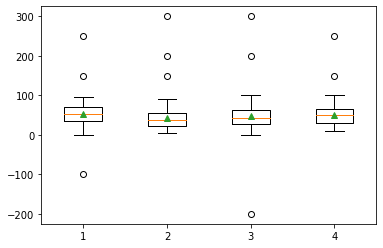

In [49]:
# csvファイルからNumPy配列の作成
import matplotlib.pyplot as plt
score = np.loadtxt("score_outlier.csv", delimiter=",", skiprows=1)
plt.boxplot(score,showmeans=True); ### 各教科の点数の配列を指定するコード ###

## Q3 標準化
以下のような形式の"exam_score.csv"ファイルを読み込み、作成したNumPyの配列を受け取り、各教科の点数をその教科の平均値と分散を用いて標準化した配列を返す`normalize_score()`関数を完成させてください。平均値と分散の計算には、NumPyの関数またはndarrayオブジェクトのメソッド、どちらを使ってもよいです。また、分散は標本分散としてください。
```Python
## exam_score.csvファイル
kokugo, shakai, sugaku, rika
30, 43, 51, 63
39, 21, 49, 56
...
```

配列の列ごとに関数やメソッドを適用するには以下のように`axis`引数を0とする。
```Python
np.mean(配列, axis=0)
配列.mean(axis=0)
```
また、配列の元の次元を保持したい場合は`keepdims`引数をTrueとする。
```Python
np.mean(配列, axis=0, keepdims=True)
配列.mean(axis=0, keepdims=True)
```

In [53]:
# csvファイルからNumPy配列の作成
score = np.loadtxt("exam_score.csv", delimiter=",", skiprows=1)
def normalize_score(a):
    a_mean = a.mean(axis=0, keepdims=True)
    a_std = a.std(axis=0, keepdims=True)
    return (a - a_mean) / a_std ### 配列aの各列をその列の平均値と分散を用いて標準化した配列を求めるコード ###

normalize_score(score) # 関数呼び出して標準化された配列を表示

array([[-1.0257849 ,  0.15882818,  0.22288369,  0.61444594],
       [-0.61237172, -0.86961243,  0.14011256,  0.28647801],
       [-1.0717197 , -0.44888673, -0.93591204,  0.33333057],
       [ 1.95997692,  2.2157094 ,  1.29890829,  2.34799071],
       [ 0.81160699,  1.46775259,  1.34029385,  0.80185618],
       [ 0.6738026 ,  0.62630118,  0.4298115 ,  0.52074082],
       [-1.0717197 , -0.63587593, -0.06681524,  0.09906777],
       [ 0.16851983,  0.67304848, -0.35651418,  0.42703569],
       [-0.33676294, -0.86961243, -1.59808102, -0.27575273],
       [ 0.7197374 ,  0.06533358, -0.68759867,  1.45779204],
       [-0.10708895,  0.15882818,  1.42306497,  1.08297155],
       [ 0.81160699,  1.00027959,  0.6367393 ,  0.98926643],
       [-0.29082814, -0.12165563, -0.39789974,  0.28647801],
       [-1.34732848, -0.72937053, -1.06006872, -0.65057322],
       [ 1.13315057,  0.67304848,  0.51258262,  1.59834973],
       [-1.71480686, -1.47732734, -0.9772976 , -0.97854114],
       [-0.70424132, -0.

`normalize_score()`関数が完成したら、以下のセルを実行して標準化された`score`配列のすべての要素の和を求めることで動作を確認してください。すべての要素の和は`1.4210854715202004e-14`となります。

In [54]:
normalize_score(score).sum()

1.4210854715202004e-14

### 参考
pandasでは以下のようにしてデータフレームの各列をその列の平均値と分散を用いて標準化できます。

In [55]:
score_df = pd.read_csv('exam_score.csv')
((score_df - score_df.mean()) / score_df.std(ddof=0)).head(5)

,kokugo,shakai,sugaku,rika
0,-1.025785,0.158828,0.222884,0.614446
1,-0.612372,-0.869612,0.140113,0.286478
2,-1.071720,-0.448887,-0.935912,0.333331
3,1.959977,2.215709,1.298908,2.347991
4,0.811607,1.467753,1.340294,0.801856


## Q4 ヒストグラム
`matplotlib`では、以下のように1次配列を入力として、ヒストグラムを可視化することができます。
```Python
plt.hist(配列, bins=階級数);
```
"exam_score.csv"ファイルを読み込み、NumPyの配列を作成し、数学（3列目）の点数のヒストグラムを可視化してください。その際、階級数は任意に設定してください。

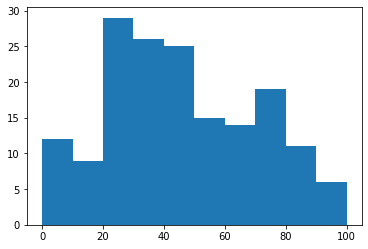

In [59]:
# csvファイルからNumPy配列の作成
score = np.loadtxt("exam_score.csv", delimiter=",", skiprows=1)
plt.hist(score[:, 2], bins=10); ### 数学の点数の配列, bins=階級数(いくつの棒にするか) ###

### 参考
平均=muと標準偏差=stdの時の正規分布に従うランダムな値からなる配列を入力とするヒストグラム

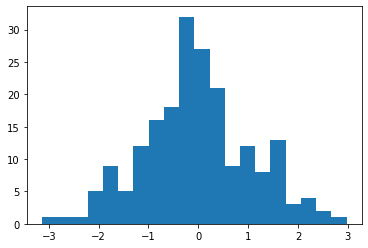

In [58]:
mu, std = 0, 1
nor = np.random.normal(mu, std,200)
plt.hist(nor, bins=20);

## Q5 相関
### Q5.1
整数を要素とする同じ長さの2つの1次元配列を入力として受け取り、それらの配列の要素の相関係数を返す`correlation()`関数を完成させてください。2つの配列は先頭から順にそれぞれの要素が対応するものとします。それぞれの配列の対応する要素の値を$x_{i}, y_{i}$とすると、相関係数は以下のように求められます。

$\frac{1}{n}\Sigma^{n}_{i=1}(\frac{x_{i}-\overline{x}}{s_{x}})(\frac{y_{i}-\overline{y}}{s_{y}})$

$\overline{x}, \overline{y}$は平均、$s_{x}, s_{y}$は標準偏差です。

In [65]:
def correlation(x, y):
    return np.corrcoef(x, y)[0, 1]### 配列xと配列yの相関係数を計算するコード ###

In [81]:
def correlation(x, y):
    sum = 0
    for i, j in zip(x, y):
        sum += ((i-np.mean(x))/np.std(x))*((j-np.mean(y))/np.std(y))
    return sum / len(y)

`correlation()`関数が完成したら、以下のセルを実行して動作を確認してください。それぞれ相関係数は`1`,`-1`となります

In [82]:
correlation(np.array([-1,1]),np.array([ -1, 1]))

1.0

In [83]:
correlation(np.array([1,-1]),np.array([-1, 1]))

-1.0

### Q5.2
以下のような形式の"exam_score.csv"ファイルを読み込み、数学と理科の点数の関係を散布図として可視化してください。
```Python
## exam_score.csvファイル
kokugo, shakai, sugaku, rika
30, 43, 51, 63
39, 21, 49, 56
...
```
`matplotlib`では、以下のように2つの1次配列を入力として、散布図を可視化することができます。
```Python
plt.plot(配列1, 配列2, 'o');
```

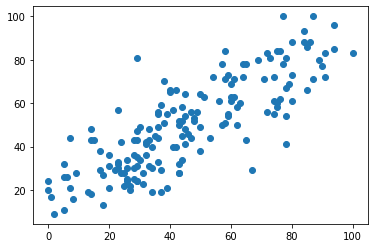

In [78]:
# csvファイルからNumPy配列の作成
score = np.loadtxt("exam_score.csv", delimiter=",", skiprows=1)
plt.plot(score[:, 2], score[:, 3], 'o'); ### 数学の点数の配列, 理科の点数の配列 ###, 'o'

### 参考
NumPyの`corrcoef()`関数を使うと2つの配列の共分散行列を以下のように求めることができます。

In [75]:
score = np.loadtxt("exam_score.csv", delimiter=",", skiprows=1)
np.corrcoef(score[:,0], score[:,1])

array([[1.        , 0.78262164],
       [0.78262164, 1.        ]])

pandasのcorrメソッドを使うとデータフレームの列間の相関係数を以下のように求めることができます。

In [76]:
score = pd.read_csv("exam_score.csv", sep=",")
score.corr(method='pearson')

,kokugo,shakai,sugaku,rika
kokugo,1.000000,0.782622,0.718526,0.717996
shakai,0.782622,1.000000,0.778242,0.834075
sugaku,0.718526,0.778242,1.000000,0.817947
rika,0.717996,0.834075,0.817947,1.000000


これらの相関係数の大小に基づいて以下のように列間の相関の大小をヒートマップとして可視化することができます。

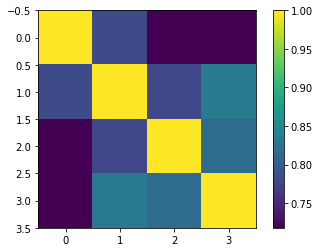

In [77]:
plt.colorbar(plt.imshow(score.corr(method='pearson')));